<a href="https://colab.research.google.com/github/SUNIDHI-SINGH/SUNIDHI-SINGH/blob/main/Assignment2_ELL784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from PIL import Image

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [8]:
root_dir = "/content/drive/MyDrive/natural_images"
import os
import cv2

data = []
labels = []
for label in os.listdir(root_dir):
    path = "/content/drive/MyDrive/natural_images/{0}/".format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        img = cv2.imread(path + image_path)
        img = cv2.resize(img, (32, 32))
        data.append(img)
        labels.append(label)

In [9]:

data = np.array(data)
labels = np.array(labels)


In [10]:
data.shape, labels.shape

((1829, 32, 32, 3), (1829,))

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

[0 0 0 ... 1 1 1]


In [12]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels)

In [13]:
data.shape, labels.shape

((1829, 32, 32, 3), (1829, 2))

In [14]:
rand = np.arange(1829)
np.random.shuffle(rand)

In [15]:
data = data[rand]
labels = labels[rand]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)


In [ ]:

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), padding="same", activation=LeakyReLU(0.001)),
    Conv2D(64, (3, 3), activation=LeakyReLU(0.001)),
    MaxPool2D((2, 2)),

    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation="softmax")
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.25,
    batch_size=32
)

Epoch 1/10
35/35 [==============================] - 9s 210ms/step - loss: 3.1197 - accuracy: 0.7712 - val_loss: 0.4935 - val_accuracy: 0.7978
Epoch 2/10
35/35 [==============================] - 5s 136ms/step - loss: 0.2385 - accuracy: 0.9098 - val_loss: 0.0858 - val_accuracy: 0.9781
Epoch 3/10
35/35 [==============================] - 4s 129ms/step - loss: 0.1298 - accuracy: 0.9590 - val_loss: 0.0956 - val_accuracy: 0.9781
Epoch 4/10
35/35 [==============================] - 7s 186ms/step - loss: 0.0679 - accuracy: 0.9763 - val_loss: 0.0356 - val_accuracy: 0.9891
Epoch 5/10
35/35 [==============================] - 4s 126ms/step - loss: 0.0633 - accuracy: 0.9809 - val_loss: 0.0359 - val_accuracy: 0.9836
Epoch 6/10
35/35 [==============================] - 6s 159ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0542 - val_accuracy: 0.9863
Epoch 7/10
35/35 [==============================] - 6s 171ms/step - loss: 0.0659 - accuracy: 0.9763 - val_loss: 0.0786 - val_accuracy: 0.9672
Epoch 

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head()


,loss,accuracy,val_loss,val_accuracy
0,3.119689,0.771194,0.493518,0.797814
1,0.238461,0.909754,0.085768,0.978142
2,0.129754,0.958979,0.095647,0.978142
3,0.067898,0.976299,0.035624,0.989071
4,0.063268,0.980857,0.035885,0.983607


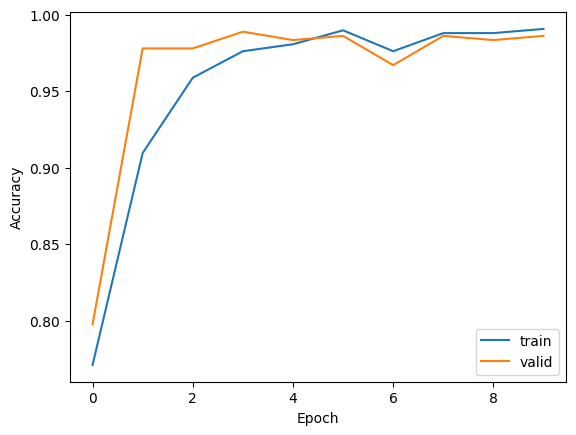

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)


12/12 [==============================] - 1s 103ms/step - loss: 0.0195 - accuracy: 0.9891


[0.019545050337910652, 0.9890710115432739]

In [ ]:
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 56ms/step


In [ ]:
print(y_pred.size)

732


In [ ]:
print(data[0].shape)
classes = model.predict(data[0:5,:,:,:])

(32, 32, 3)
1/1 [==============================] - 0s 26ms/step


In [ ]:
print(classes)

[[4.5202096e-06 9.9999547e-01]
 [3.7565661e-07 9.9999964e-01]
 [1.0957119e-01 8.9042884e-01]
 [1.0000000e+00 1.3396138e-11]
 [9.9998653e-01 1.3527460e-05]]


Softmax Output:  [0.2689432  0.73105675]


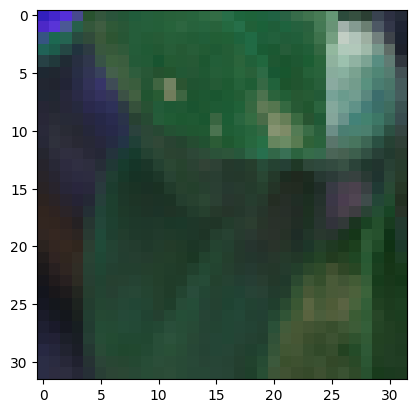

In [ ]:
import numpy as np

# Defining the softmax function
def softmax(values):

    # Computing element wise exponential value
    exp_values = np.exp(values)

    # Computing sum of these values
    exp_values_sum = np.sum(exp_values)

    # Returing the softmax output.
    return exp_values/exp_values_sum
output = softmax(classes[0])
print("Softmax Output: ", output)

import matplotlib.pyplot as plt
plt.imshow(data[100])
plt.show()

1/1 [==============================] - 0s 78ms/step
(1, 13, 13, 64)


<Figure size 200x200 with 0 Axes>

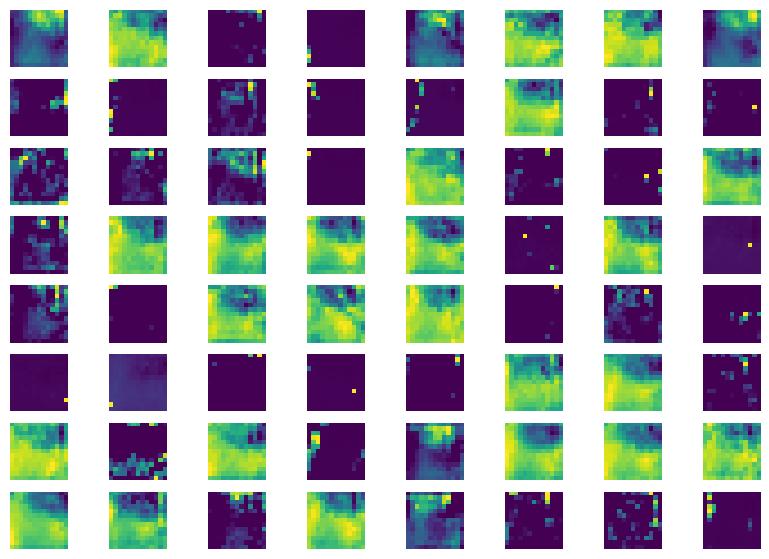

In [ ]:
# Outputs of the 4 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(data[100:101,:,:,:])
for l in range(4,5):
  # Getting Activations of first layer
  first_layer_activation = activations[l]

  # create figure
  fig = plt.figure(figsize=(2, 2))
  # shape of first layer activation
  print(first_layer_activation.shape)
  # Adds a subplot at the 1st position

  # # 6th channel of the image after first layer of convolution is applied
  # plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')

  # # 15th channel of the image after first layer of convolution is applied
  # plt.matshow(first_layer_activation[0, :, :, 2], cmap ='viridis')




# create figure
fig = plt.figure(figsize=(10,7))

# setting values to rows and column variables
rows = 8
columns = 8
for i in range(1,65):
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns,i)

  # showing image
  plt.imshow(first_layer_activation[0, :, :, i-1])
  plt.axis('off')











## Receptive Field Calculation

In [3]:
! git clone https://github.com/google-research/receptive_field.git
import tensorflow.compat.v1 as tf
import receptive_field as rf

Cloning into 'receptive_field'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 79 (delta 4), reused 4 (delta 4), pack-reused 72
Receiving objects: 100% (79/79), 58.60 KiB | 1.89 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [23]:
# Example given here: InceptionV3.
g = tf.Graph()
with g.as_default():
  from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, LeakyReLU
  from tensorflow.keras.models import Sequential

  model = Sequential([
      Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
      Conv2D(32, (3, 3), activation='relu'),
      MaxPool2D((2, 2)),

      Conv2D(64, (3, 3), padding="same", activation=LeakyReLU(0.001)),
      Conv2D(64, (3, 3), activation=LeakyReLU(0.001)),
      MaxPool2D((2, 2)),

      Dropout(0.25),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(2, activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.25,
    batch_size=32
)
print(model.summary())

Train on 1097 samples, validate on 366 samples
Epoch 1/10
1088/1097 [============================>.] - ETA: 0s - loss: 2.1465 - accuracy: 0.7169

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1097/1097 [==============================] - 5s 4ms/sample - loss: 2.1309 - accuracy: 0.7183 - val_loss: 0.1444 - val_accuracy: 0.9481
Epoch 2/10
1097/1097 [==============================] - 5s 4ms/sample - loss: 0.1374 - accuracy: 0.9508 - val_loss: 0.0477 - val_accuracy: 0.9809
Epoch 3/10
1097/1097 [==============================] - 6s 6ms/sample - loss: 0.0492 - accuracy: 0.9854 - val_loss: 0.2546 - val_accuracy: 0.9180
Epoch 4/10
1097/1097 [==============================] - 4s 4ms/sample - loss: 0.0995 - accuracy: 0.9644 - val_loss: 0.0461 - val_accuracy: 0.9863
Epoch 5/10
1097/1097 [==============================] - 5s 4ms/sample - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.0556 - val_accuracy: 0.9836
Epoch 6/10
1097/1097 [==============================] - 6s 6ms/sample - loss: 0.0497 - accuracy: 0.9827 - val_loss: 0.0374 - val_accuracy: 0.9836
Epoch 7/10
1097/1097 [==============================] - 4s 4ms/sample - loss: 0.0136 - accuracy: 0.9973 - val_loss: 0.0271 - val_accura

In [21]:
graph_def = g.as_graph_def()

In [24]:
input_node = 'conv2D'
output_node = 'Conv2D_1'
(receptive_field_x, receptive_field_y, effective_stride_x,
 effective_stride_y, effective_padding_x, effective_padding_y) = (
         rf.compute_receptive_field_from_graph_def(graph_def, input_node,
                                                   output_node))


AttributeError: ignored